<a href="https://colab.research.google.com/github/taterfries1/Chat-On/blob/main/final_project_by_Vaxu_Ronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# These are very incomplete >:)
df = pd.read_csv("archive.zip")
df.describe()

,Age,Academic Pressure,Study Satisfaction,Study Hours,Financial Stress
count,502.000000,502.000000,502.000000,502.000000,502.000000
mean,26.241036,3.003984,3.075697,6.404382,2.928287
std,4.896501,1.390007,1.373490,3.742434,1.425053
min,18.000000,1.000000,1.000000,0.000000,1.000000
25%,22.000000,2.000000,2.000000,3.000000,2.000000
50%,26.500000,3.000000,3.000000,7.000000,3.000000
75%,30.000000,4.000000,4.000000,10.000000,4.000000
max,34.000000,5.000000,5.000000,12.000000,5.000000


In [ ]:
df.head()

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,28,2.0,4.0,7-8 hours,Moderate,Yes,9,2,Yes,No
1,Male,28,4.0,5.0,5-6 hours,Healthy,Yes,7,1,Yes,No
2,Male,25,1.0,3.0,5-6 hours,Unhealthy,Yes,10,4,No,Yes
3,Male,23,1.0,4.0,More than 8 hours,Unhealthy,Yes,7,2,Yes,No
4,Female,31,1.0,5.0,More than 8 hours,Healthy,Yes,4,2,Yes,No


In [ ]:
print(df.dtypes)

Gender                                    object
Age                                        int64
Academic Pressure                        float64
Study Satisfaction                       float64
Sleep Duration                            object
Dietary Habits                            object
Have you ever had suicidal thoughts ?     object
Study Hours                                int64
Financial Stress                           int64
Family History of Mental Illness          object
Depression                                object
dtype: object


In [ ]:
df['Suicidal_Thoughts_Values'] = df['Have you ever had suicidal thoughts ?'].map({'Yes': 1, 'No': 0})
df['Family_History_Values'] = df['Family History of Mental Illness'].map({'Yes': 1, 'No': 0})
df['Gender_Values'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['depression_value'] = df['Depression'].map({'Yes': 1, 'No': 0})


df.head()

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression,Suicidal_Thoughts_Values,Family_History_Values,Gender_Values,depression_value
0,Male,28,2.0,4.0,7-8 hours,Moderate,Yes,9,2,Yes,No,1,1,1,0
1,Male,28,4.0,5.0,5-6 hours,Healthy,Yes,7,1,Yes,No,1,1,1,0
2,Male,25,1.0,3.0,5-6 hours,Unhealthy,Yes,10,4,No,Yes,1,0,1,1
3,Male,23,1.0,4.0,More than 8 hours,Unhealthy,Yes,7,2,Yes,No,1,1,1,0
4,Female,31,1.0,5.0,More than 8 hours,Healthy,Yes,4,2,Yes,No,1,1,0,0


In [ ]:
# Question to answer.
gp= df.groupby('Gender')['Academic Pressure'].mean()
print(gp)

print("\n")


gp2= df.groupby('Age')['Financial Stress'].mean()
top_2 = gp2.nlargest(18)

print(top_2)

print("\n")
gd = df.groupby('Family_History_Values')['depression_value'].mean()

with_h = gd[1] if 1 in gd else 0
without_h = gd[0] if 0 in gd else 0


print(f"Proportion of individuals with depression and family history of mental illness: {with_h:.2f}")
print(f"Proportion of individuals with depression and no family history of mental illness: {without_h:.2f}")

print("\n")

gr  = df.groupby('Dietary Habits')['Depression'].value_counts()

gd5 = gr.reset_index(name='Counts')

print(gd5)



Gender
Female    3.021277
Male      2.988764
Name: Academic Pressure, dtype: float64


Age
24    3.567568
20    3.513514
26    3.318182
21    3.172414
25    3.103448
22    3.086957
23    3.083333
34    2.906250
28    2.846154
33    2.833333
31    2.814815
19    2.730769
27    2.653846
29    2.583333
32    2.481481
30    2.428571
18    2.416667
Name: Financial Stress, dtype: float64


Proportion of individuals with depression and family history of mental illness: 0.53
Proportion of individuals with depression and no family history of mental illness: 0.48


  Dietary Habits Depression  Counts
0        Healthy         No      97
1        Healthy        Yes      64
2       Moderate         No      90
3       Moderate        Yes      82
4      Unhealthy        Yes     106
5      Unhealthy         No      63


array([28, 25, 23, 31, 19, 34, 20, 33, 24, 21, 29, 30, 32, 26, 22, 27, 18])

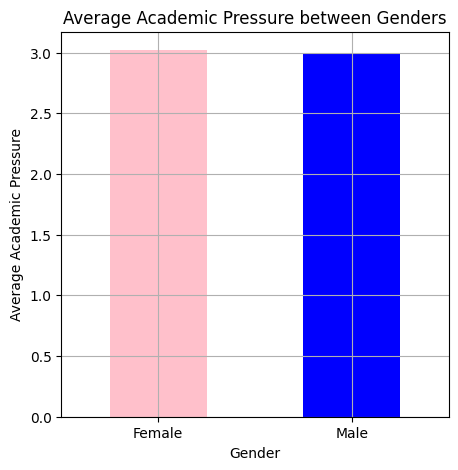

In [ ]:
gp= df.groupby('Gender')['Academic Pressure'].mean()


plt.figure(figsize=(5, 5))
gp.plot(kind='bar', color=['pink', 'blue'])

plt.xlabel('Gender')
plt.ylabel('Average Academic Pressure')
plt.title('Average Academic Pressure between Genders')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'], rotation=0)
plt.grid(True)
plt.show()

# In the graph below, it shows the average amount of reported academic pressure between genders. The academic pressure is sligthly higher in female than male as shown in the graph.

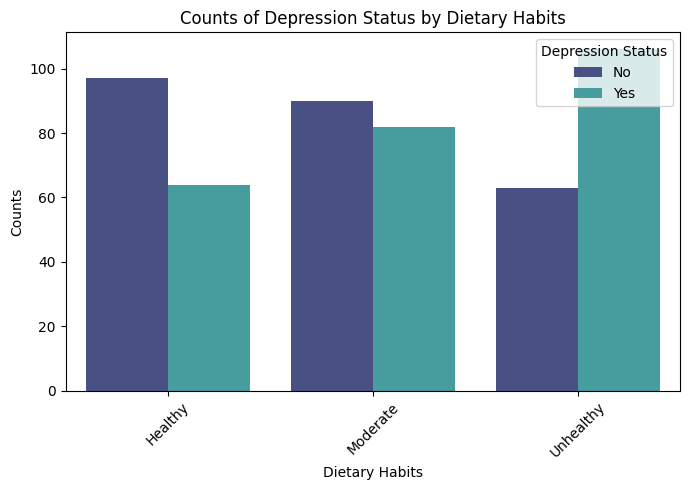

In [ ]:
plt.figure(figsize=(7, 5))
sns.barplot(data=gd5, x="Dietary Habits", y="Counts", hue="Depression", palette="mako")
plt.title("Counts of Depression Status by Dietary Habits")
plt.xlabel("Dietary Habits")
plt.ylabel("Counts")
plt.xticks(rotation=45)
plt.legend(title="Depression Status")
plt.tight_layout()
plt.show()
# The graph below shows the dietary habit level and the counts of people who reports have depression and not having it. In the graph, it is shown that people who report depression are also more likely to have an unhealthy diet.

<ipython-input-11-f1dab4c9020b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_2.values, y=top_2.index, palette="coolwarm", orient='h')


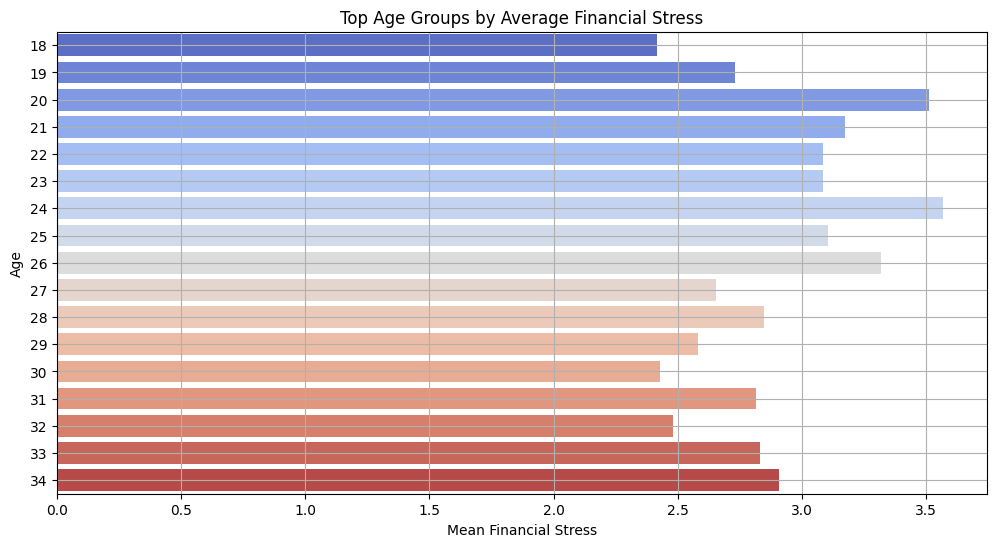

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_2.values, y=top_2.index, palette="coolwarm", orient='h')
plt.title("Top Age Groups by Average Financial Stress")
plt.xlabel("Mean Financial Stress")
plt.ylabel("Age")
plt.grid(True)
plt.show()

# In the graph it shows the average reported amount of financial stress for each age ranging from 18-34, the highest amount being 24 year olds while the lowest are 18.

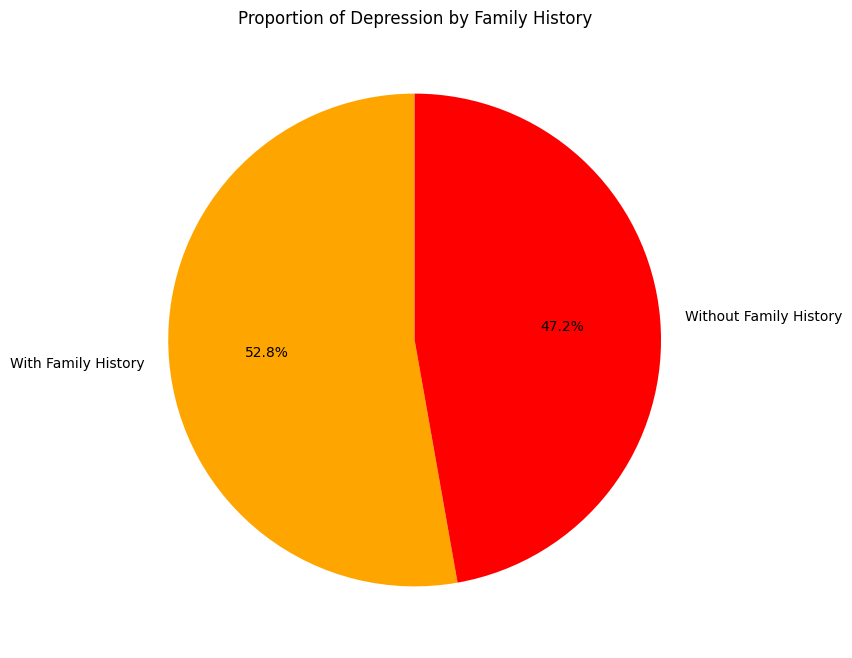

In [ ]:
labels = ['With Family History', 'Without Family History']
sizes = [with_h, without_h]
colors = ['orange','red']
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Proportion of Depression by Family History")
plt.show()

# This pie chart represents the proportion of individuals who suffer from depression that has a family history of mental illness, while the other chunk represents people who reported not having any family history of mental illness. In the chart, it suggests that people with family history of depression are slightly more likely to suffer from depression than people without any history, although the difference is small.
